# Univariate Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fn

In [2]:
# load dataset
wine = pd.read_csv('../data/wine_df_final.csv', sep='|')

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vintage_name          4051 non-null   object 
 1   wine_name             4051 non-null   object 
 2   year                  4051 non-null   int64  
 3   region                4051 non-null   object 
 4   bodega                4051 non-null   object 
 5   varietal_name         4051 non-null   object 
 6   grape_varieties       4051 non-null   object 
 7   price                 4051 non-null   float64
 8   acidity               4051 non-null   float64
 9   intensity             4051 non-null   float64
 10  sweetness             4051 non-null   float64
 11  tannin                2025 non-null   float64
 12  wine_ratings_count    4051 non-null   int64  
 13  wine_ratings_average  4051 non-null   float64
 14  red/white             4051 non-null   object 
 15  grape_count          

In [4]:
wine.head()

,vintage_name,wine_name,year,region,bodega,varietal_name,grape_varieties,price,acidity,intensity,sweetness,tannin,wine_ratings_count,wine_ratings_average,red/white,grape_count,communidad
0,Territorio Luthier Territorio Luthier Blanco 2020,Territorio Luthier Blanco,2020,Ribera del Duero,Territorio Luthier,White,"Albillo Mayor, Purulés",41.00,3.000000,3.294000,1.000000,NaN,104,4.5,w,2,Castilla y Leon
1,Ossian Capitel 2021,Capitel,2021,Castilla y León,Ossian,Verdejo,Verdejo,36.20,3.157474,2.987014,2.391702,NaN,1450,4.4,w,1,Castilla y Leon
2,Remírez de Ganuza Rioja Blanco Reserva 2021,Rioja Blanco Reserva,2021,Rioja,Remírez de Ganuza,Rioja White,Viura,33.50,3.297252,3.943942,1.859631,NaN,520,4.4,w,1,La Rioja
3,Abadía Retuerta LeDomaine Blanco de Guarda 2020,LeDomaine Blanco de Guarda,2020,Abadía Retuerta,Abadía Retuerta,White,"Sauvignon Blanc, Verdejo",37.99,3.104326,3.298066,1.666030,NaN,3727,4.3,w,2,Castilla y Leon
4,Abadía Retuerta LeDomaine Blanco de Guarda 2019,LeDomaine Blanco de Guarda,2019,Abadía Retuerta,Abadía Retuerta,White,"Sauvignon Blanc, Verdejo",44.75,3.104326,3.298066,1.666030,NaN,3727,4.3,w,2,Castilla y Leon


In [91]:
cardinalityDF = fn.card_tipo(wine, 24)
cardinalityDF

,Card,%_Card,dType,tipo_sugerido
vintage_name,4051,100.0,object,Numerica continua
wine_name,2455,60.60232,object,Numerica continua
year,22,0.543076,int64,Categorica
region,117,2.888176,object,Numerica discreta
bodega,1124,27.746235,object,Numerica discreta
varietal_name,24,0.592446,object,Numerica discreta
grape_varieties,320,7.899284,object,Numerica discreta
price,1408,34.75685,float64,Numerica continua
acidity,2546,62.848679,float64,Numerica continua
intensity,2531,62.4784,float64,Numerica continua


In [6]:
# going to use the cardinality DF to build a description table of my dataset
indexes = ['vintage_name','wine_name','region','bodega','varietal_name','grape_varieties']
cardinalityDF.loc[indexes, 'tipo_sugerido'] = 'Nominal'
cardinalityDF

,Card,%_Card,dType,tipo_sugerido
vintage_name,4051,100.0,object,Nominal
wine_name,2455,60.60232,object,Nominal
year,22,0.543076,int64,Categorica
region,117,2.888176,object,Nominal
bodega,1124,27.746235,object,Nominal
varietal_name,24,0.592446,object,Nominal
grape_varieties,320,7.899284,object,Nominal
price,1408,34.75685,float64,Numerica continua
acidity,2546,62.848679,float64,Numerica continua
intensity,2531,62.4784,float64,Numerica continua


In [7]:
cardinalityDF.index.tolist()

['vintage_name',
 'wine_name',
 'year',
 'region',
 'bodega',
 'varietal_name',
 'grape_varieties',
 'price',
 'acidity',
 'intensity',
 'sweetness',
 'tannin',
 'wine_ratings_count',
 'wine_ratings_average',
 'red/white',
 'grape_count',
 'communidad']

In [8]:
 # made a description dictionary that will be used to populate the description column
 description_dict = {
    'vintage_name': 'name of the specific vintage',
    'wine_name':'name of the wine',
    'year':'year of the vintage (when grapes were harvested)',
    'region':'the local region wine was made in',
    'bodega':'name of the bodega that produced the wine',
    'varietal_name':"the wine's type",
    'grape_varieties': ' The varieties of grape in the wine',
    'price':'price of the wine in Euros',
    'acidity':' Average acidity rating given by reviewers',
    'intensity':'Average intensity of aroma rated by reviewers',
    'sweetness':'Average intensity of aroma rated by reviewers',
    'tannin':'Average intensity of aroma rated by reviewers',
    'wine_ratings_count':'number of ratings by reviewers',
    'wine_ratings_average':'Average rating by reviewers',
    'red/white':'If the wine is red of white',
    'grape_count':'Number of different grape varieties in the wine',
    'communidad': 'Communidad Autonoma the wine is from'
 }

In [9]:
cardinalityDF['description'] = cardinalityDF.index.map(description_dict)

In [10]:
# description table for dataset
cardinalityDF

,Card,%_Card,dType,tipo_sugerido,description
vintage_name,4051,100.0,object,Nominal,name of the specific vintage
wine_name,2455,60.60232,object,Nominal,name of the wine
year,22,0.543076,int64,Categorica,year of the vintage (when grapes were harvested)
region,117,2.888176,object,Nominal,the local region wine was made in
bodega,1124,27.746235,object,Nominal,name of the bodega that produced the wine
varietal_name,24,0.592446,object,Nominal,the wine's type
grape_varieties,320,7.899284,object,Nominal,The varieties of grape in the wine
price,1408,34.75685,float64,Numerica continua,price of the wine in Euros
acidity,2546,62.848679,float64,Numerica continua,Average acidity rating given by reviewers
intensity,2531,62.4784,float64,Numerica continua,Average intensity of aroma rated by reviewers


In [29]:
# column/variable types for analysis
categoricas = ['red/white','grape_count','wine_ratings_average','communidad','year']
numericas = ['price','acidity','intensity','sweetness','tannin','wine_ratings_count']

# ***Categoric Variables***

In [21]:
# first task is to check the value counts for the categoric variables
# I made a function to print all directly.
fn.print_counts(wine, categoricas)

For red/white
           freq count  rel freq count
red/white                            
w                2026           50.01
r                2025           49.99



For grape_count
             freq count  rel freq count
grape_count                            
1                  2452           60.53
2                   663           16.37
3                   623           15.38
4                   243            6.00
6                    48            1.18
5                    14            0.35
7                     5            0.12
8                     3            0.07



For wine_ratings_average
                      freq count  rel freq count
wine_ratings_average                            
4.0                          930           22.96
4.1                          879           21.70
3.9                          660           16.29
4.2                          529           13.06
3.8                          511           12.61
4.3                          287            

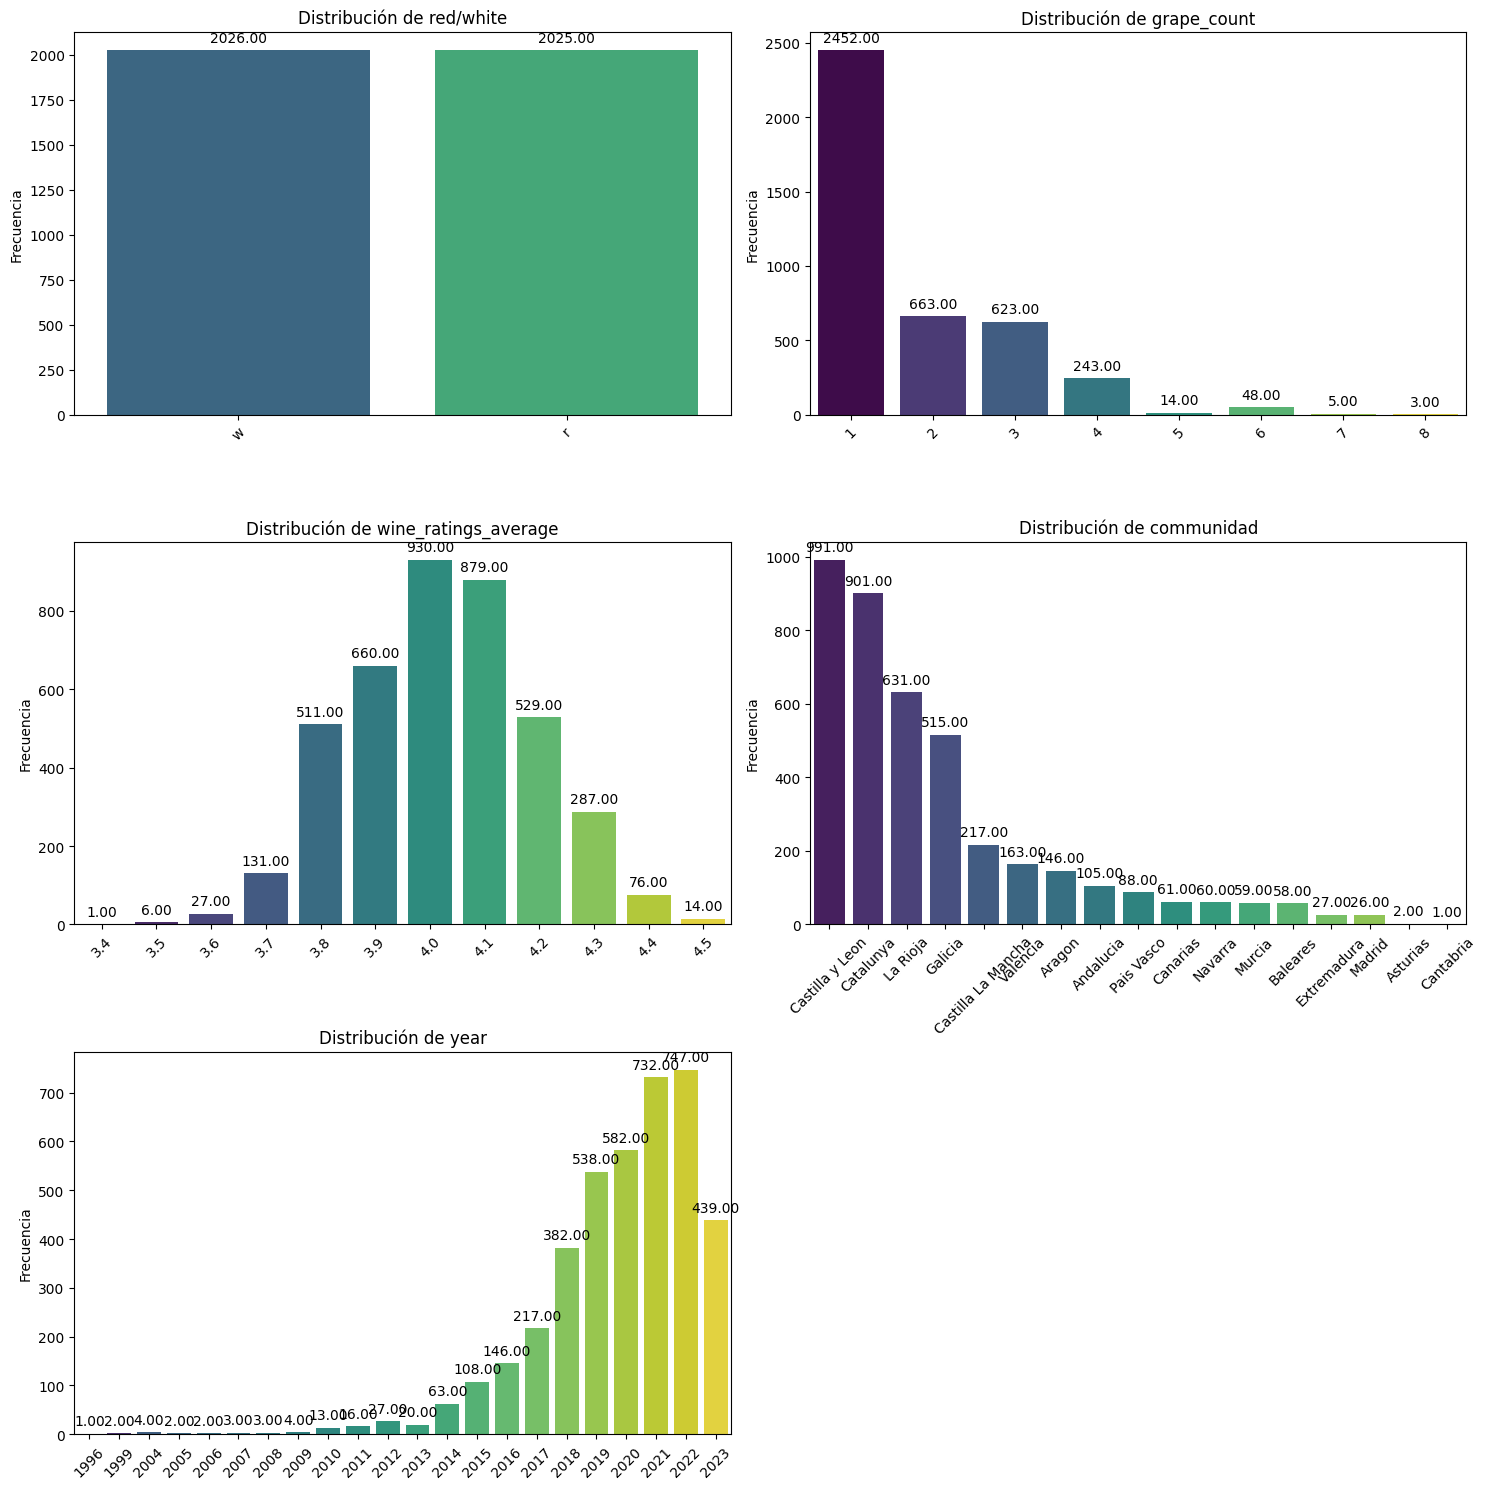

In [22]:
# Distributions of categoric variables
fn.pinta_distribucion_categoricas(wine, categoricas, mostrar_valores=True)

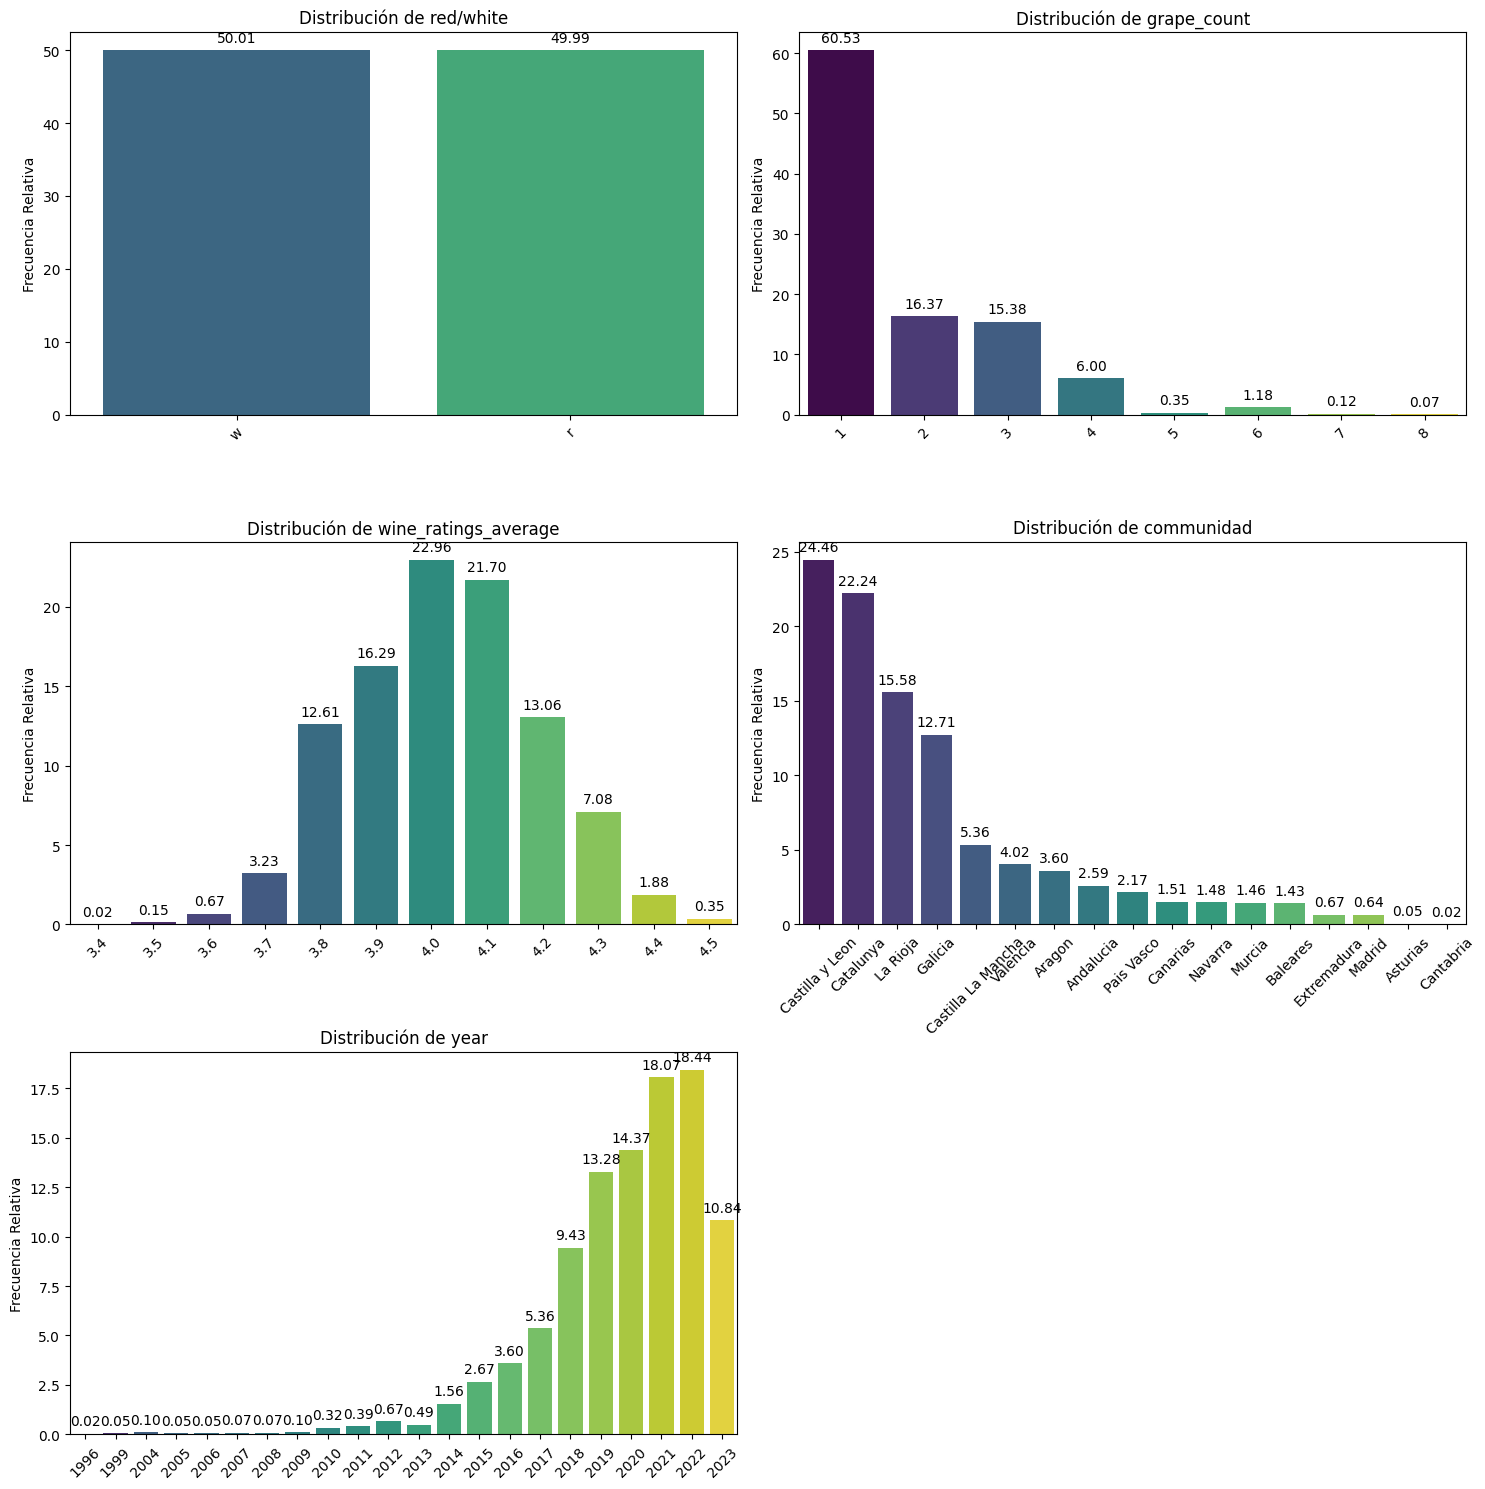

In [23]:
# Relative distributions of categoric variables
fn.pinta_distribucion_categoricas(wine, categoricas, relativa=True, mostrar_valores=True)

In [15]:
# mode for categoric variables
wine[categoricas].mode().T

,0
year,2022
wine_ratings_average,4.0
grape_count,1
communidad,Castilla y Leon
red/white,w


## **Observations of categoric variables**  

***`red/white`***  
- Dataset is evenly distributed (`50% red wine` : `50% white wine`) but this is mainly due to the data collection method.
- Look into the historical production records in Spain for red wine and white wine percentages.
- Check in bivariate analysis if this distribution is true for `wine_ratings_average`, `communities`, and `year`  


***`grape_count`***  
- Interestingly `60% of the dataset were monovarietal wines` (made from only 1 grape variety), with 16% and 15% making up wines made from 2 and 3 grape varieties respectively.
- With these `three groups making up over 90%` of the dataset it will be interesting to investigate any relationship between this distribution and all other categorical variables.

- **Questions:** 
    - `grape_count and wine_ratings_average`
        - Is there a link between number of different grapes used to make a wine and average rating given? 
    - `grape_count and community`
        - Is there a link between number of different grapes used to make a wine and the community in which it is produced?
    - `grape_count and year`
        - Is there a link between number of different grapes used to make a wine and its year of production?
    - `grape_count and year`
        - Is there a link between number of different grapes used to make a wine and the year of production?
    - `grape_count and red/white`
        - Is there a link between number of different grapes used to make red and white wines?  


***`wine_ratings_average`***  
- Fairly normal distribution around a modal value of 4.0 (22%), with ratings from 3.9 to 4.1 making up over 50% of the dataset.
- Only had ratings from 3.4 to 4.5 stepped in 0.1 intervals
- Again it will be interesting to see if this distribution of ratings holds true for each of the other categorical variable to see if there is a particular type, community or year in which wines are rated better or worse on average.
- Particularly interested to investigate any link between distribuion of `grape_count` and `win_ratings_average`



***`community`***  
- As somewhat expected, Castilla y Leon (24%), Cataluña (22%) and La Rioja (16%) take up the top 3 CCAAs of the dataset.
- Again, it would seem like a good idea to carry out bivariate analysis with all of the other categorical variables to see if there is a link and this top 3 distribution holds true for all variable.
- Can't really single out one variable as more intesting to investigate here but i think wine_ratings_average needs to take precedent.

- **Question:** 
    - Is there a link between the year of production and the community?



***`year`***
- The majority of the wines in the dataset came from 2019 (13.28%), 2020 (14.37%), 2021 (18.07%), 2022 (18.44%), 2023 (10.84%)
- Interesting that 2023 had the lowest percentage of these 4 vintages.
- Farily even trail-off with the vintages. The older the vintage the lower the frequency in the dataset.
- Again interesting to do bivariate with all other categorical variables.

## **Further ideas for analysis:**  

- extract all grape varities and remove sinonymous varietal names (e.g.Listan Blanco - Palomino)
- make a function to be able to see the most common grape varities by wine type, community, etc.
- help to answer the questions surrounding specific grape varieties eg:
    - which grape variety has the highest wine_ratings_average, is most grown in each community, tendency to be used more in younger/older vintages, more often used in monovarietal than blends?


# ***Numeric Variables***

In [30]:
# 1. Central tendency stats for numeric variables
central_tendencies = fn.get_central_tends(wine, numericas)
central_tendencies

,variable,count,mean,std,min,25%,50%,75%,max,IQR,range,CV
0,price,4051.0,22.82,11.00,2.96,13.95,20.70,29.90,50.00,15.95,47.04,0.48
1,acidity,4051.0,3.36,0.38,2.00,3.09,3.32,3.63,5.00,0.54,3.00,0.11
2,intensity,4051.0,3.43,0.71,1.13,3.00,3.54,3.94,5.00,0.94,3.87,0.21
3,sweetness,4051.0,1.70,0.40,1.00,1.47,1.72,1.93,3.56,0.46,2.56,0.23
4,tannin,2025.0,3.40,0.34,2.39,3.13,3.42,3.66,4.53,0.53,2.14,0.10
5,wine_ratings_count,4051.0,3882.77,11191.94,25.00,230.00,833.00,2721.00,230584.00,2491.00,230559.00,2.88


### ***`price`***|

(2,)


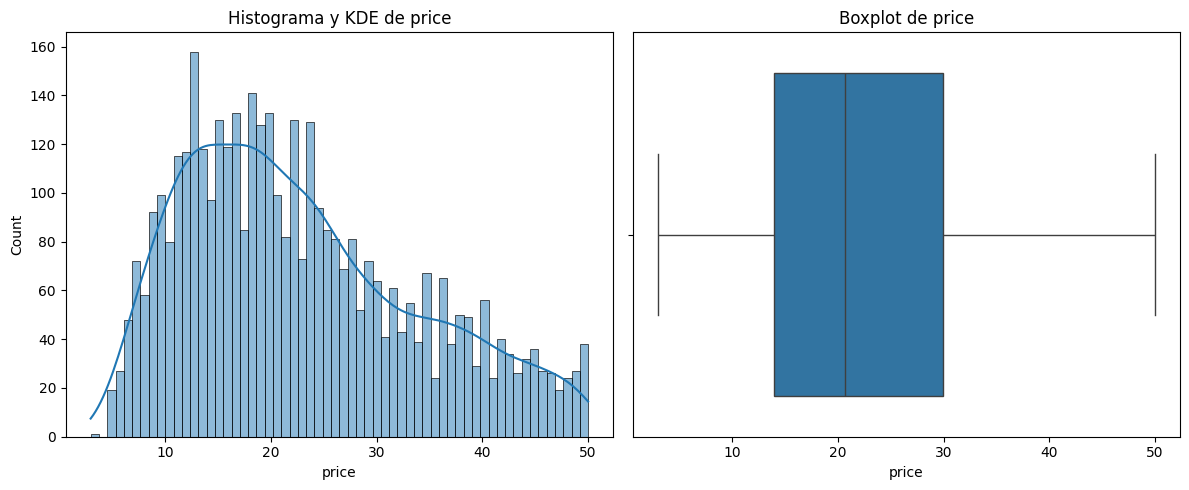

In [60]:
# Histogram and boxplot of 'price'
fn.plot_combined_graphs(wine, ['price'], whisker_width=2, bins=60)

#### **Symmetry and skewness**

- mean (22.82) and median (20.70) are quite close together indicating a farily normal distribution
- however, the median being less than the mean suggests data is positively skewed, which is reflected in the histogram, perhaps making the median a better representative of the central tendency.

#### **Dispersion, Variability, outliers**

- range of 47.04 expected as the max price for wine data was set at 50euros
- The IQR shows that 50% of the data is concentrated around a range of 15.95 euros
- std of 11.00 and CV of 48% suggest there is quite significant variability within the middle 50% of the data (e.g. quite disperse) This is perhaps to be expected given the max price limit
- boxplot doesnt show any outliers.

#### **Ideas / questions**

- Price is an interesting variable to look at in relation to all categoric variables
- multivariate of `price` with `wine_ratings_average` and relate it to each other categoric
- possibly transform and group 'price' (bining) then do multivariate of `price_grouped` with 'wine_ratings_average` and the different characteristic measures (acidity, sweetness etc)

### ***`acidity`***

(2,)


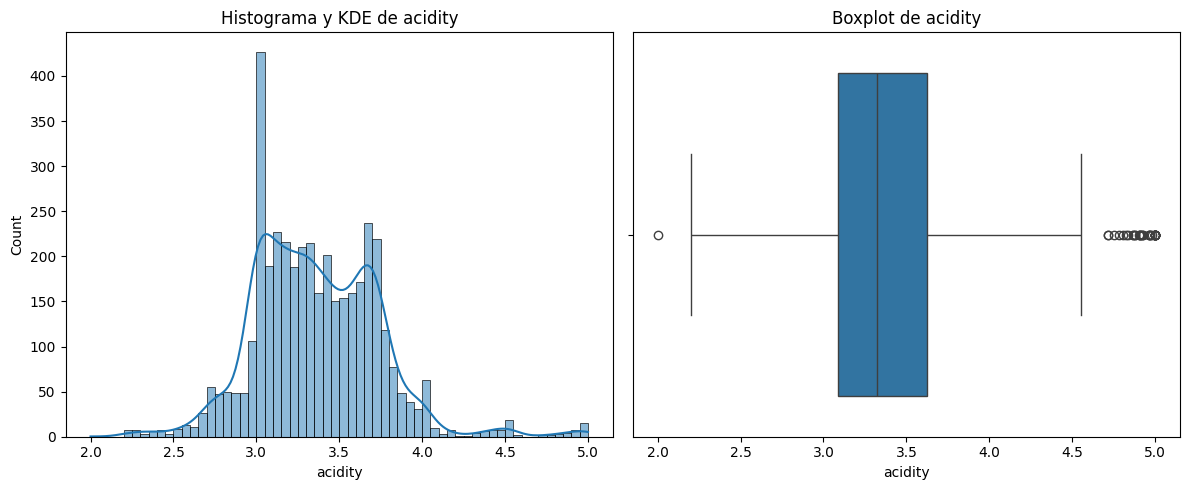

In [65]:
fn.plot_combined_graphs(wine, ['acidity'], whisker_width=2, bins=60)

#### **Symmetry and skewness**

- mean (3.36) and median (3.32) are very close together indicating a even distribution and reinforced visually by the boxplot. 
- Both values seem representative of the overall dataset and dont suggest the data is skewed.


#### **Dispersion, Variability, outliers**

- range of 3.00
- The IQR shows that 50% of the data is concentrated around a range of 0.54 points
- std of 0.34 and CV of 11% suggest there is very low variability within the middle 50% of the data (e.g. little dispersion).
- boxplot shows presence of some outliers that should be investigated as possibly interesting data points

#### **Ideas / questions**

- How is `acidity` related to `wine_ratings_average`?
- Investigate peak at around 3.0.
    - Is there a specific community/region that has much higher acidity?
    - Is white or red causing this high peak?
- Does it make sense to split/filter the dataset for any analysis including `acidity`
- Investigate outliers by filtering them to look into the above ideas.

In [66]:
# Investigate outliers by filtering them to look into the above ideas.
high_acidity = wine[wine['acidity'] > 4.5]
print(len(high_acidity))
print('percentage of outliers:', round(len(high_acidity)/len(wine)*100, 2))
high_acidity[high_acidity['red/white'] == 'w']

48
percentage of outliers: 1.18


,vintage_name,wine_name,year,region,bodega,varietal_name,grape_varieties,price,acidity,intensity,sweetness,tannin,wine_ratings_count,wine_ratings_average,red/white,grape_count,communidad
49,Oxer Wines Marko Terlegiz 2022,Marko Terlegiz,2022,Bizkaiko Txakolina,Oxer Wines,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",47.90,4.880827,2.631429,1.985639,NaN,205,4.3,w,6,Pais Vasco
147,Gorka Izagirre Ama 2021,Ama,2021,Bizkaiko Txakolina,Gorka Izagirre,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",32.80,5.000000,3.000000,1.000000,NaN,251,4.2,w,6,Pais Vasco
185,Oxer Wines Marko Terlegiz 2021,Marko Terlegiz,2021,Bizkaiko Txakolina,Oxer Wines,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",46.10,4.880827,2.631429,1.985639,NaN,205,4.3,w,6,Pais Vasco
229,Gorka Izagirre Ama 2019,Ama,2019,Bizkaiko Txakolina,Gorka Izagirre,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",34.50,5.000000,3.000000,1.000000,NaN,251,4.2,w,6,Pais Vasco
418,Bermejo Malvasía Seco Fermentado en Barricas 2022,Malvasía Seco Fermentado en Barricas,2022,Lanzarote,Bermejo,White,Malvasía,25.50,4.528915,1.939759,1.826145,NaN,166,4.1,w,1,Canarias
445,Doniene Gorrondona Ondarea 2019,Ondarea,2019,Bizkaiko Txakolina,Doniene Gorrondona,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",18.85,5.000000,3.042649,1.371788,NaN,122,4.1,w,6,Pais Vasco
452,Gorka Izagirre 42 Zura 2019,42 Zura,2019,Bizkaiko Txakolina,Gorka Izagirre,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",23.50,4.910512,2.988034,1.490855,NaN,414,4.1,w,6,Pais Vasco
507,Makatzak Wild Wines Ghaur 2022,Ghaur,2022,Getariako Txakolina,Makatzak Wild Wines,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",25.70,4.785000,3.345000,1.115000,NaN,66,4.1,w,6,Pais Vasco
520,Makatzak Wild Wines Sorkin 2021,Sorkin,2021,Getariako Txakolina,Makatzak Wild Wines,Txakoli,"Petit Manseng, Petit Courbu, Folle Blanche, Ho...",25.70,4.900000,3.146667,1.000000,NaN,91,4.1,w,6,Pais Vasco
545,El Borujo Los Loros La Bota de Mateo 2021,Los Loros La Bota de Mateo,2021,Valle de Güímar,El Borujo,White,Listan_blanco,32.17,4.530000,2.000000,1.480000,NaN,51,4.1,w,1,Canarias


In [67]:
high_acidity.communidad.value_counts()

communidad
Pais Vasco    35
Canarias      13
Name: count, dtype: int64

(2,)


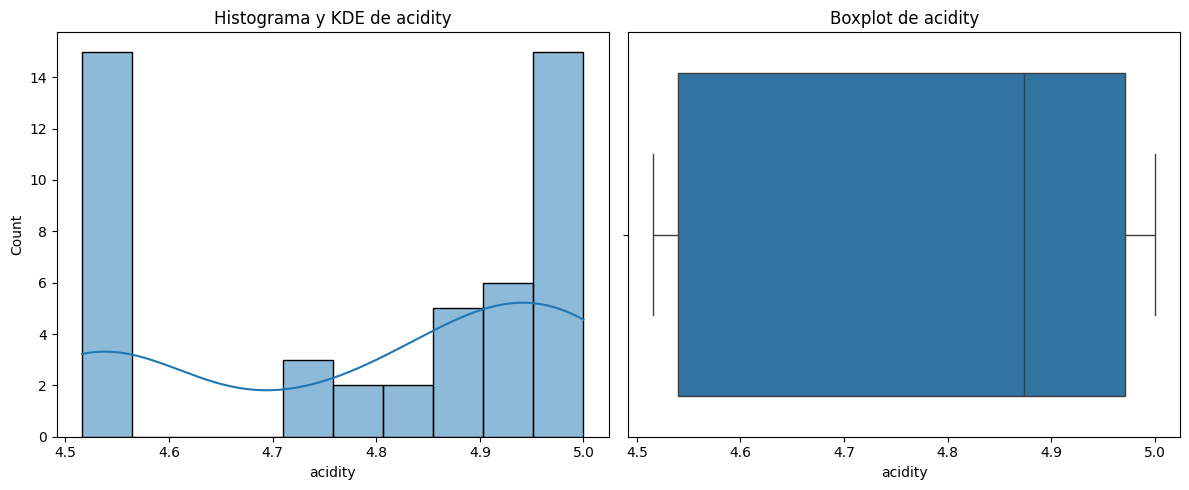

In [97]:
# histogram and boxplot of high acidity filtered 
fn.plot_combined_graphs(high_acidity, ['acidity'], whisker_width = 1.5, bins=10)

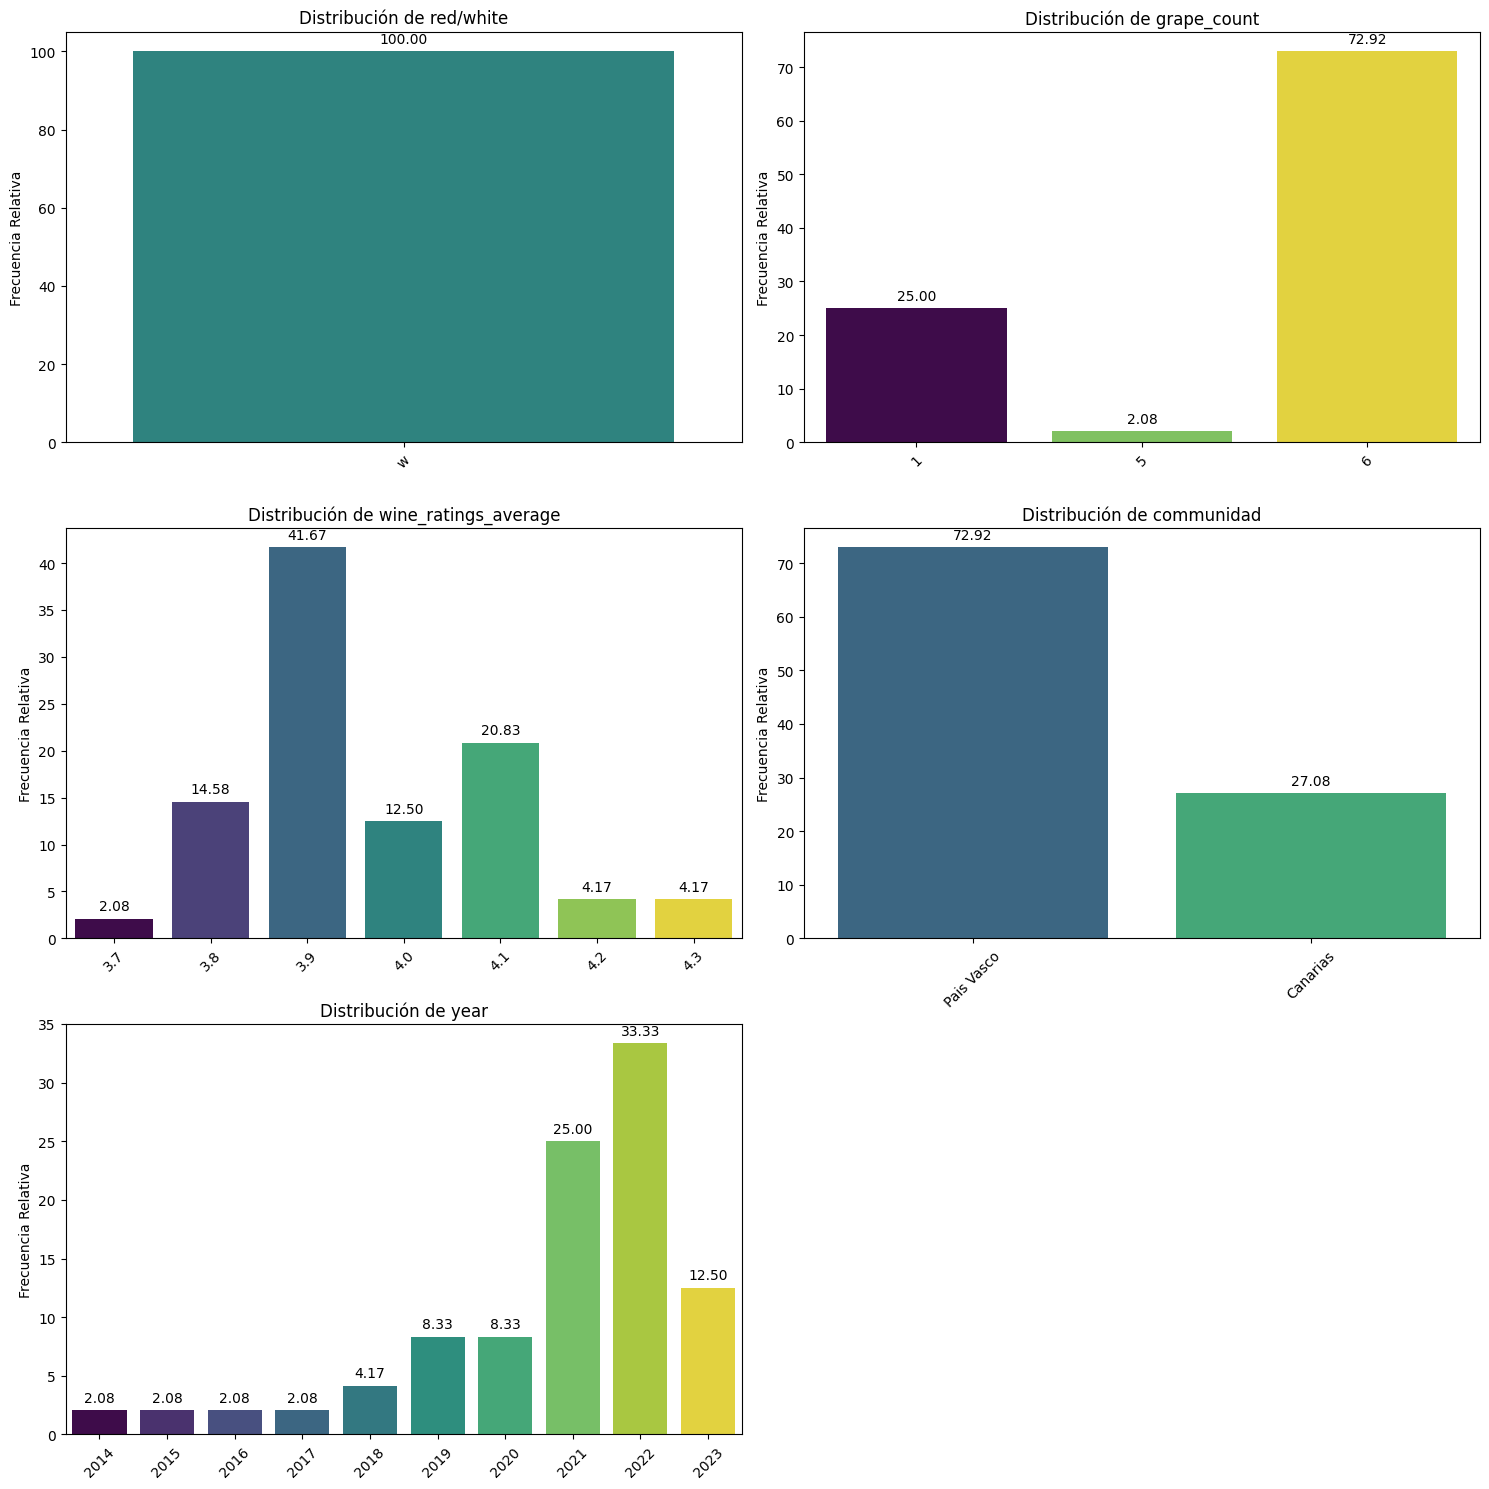

In [70]:
fn.pinta_distribucion_categoricas(high_acidity, categoricas, relativa=True, mostrar_valores=True)

#### ***Some conclusions to the questions about acidity outiers:***

- All acidity outlier from original dataset are from white wines.
- Wines with high acidity are most likely to be made from a blend of 6 grapes or be monovarietal
    - Most txakolis made from a blend. High acidity wines are mostly (72%) from Pais Vasco.
- All are from either Pais Vasco (73%) or Canarias (27%).
- Higher percentage of wine_rating_average in a slightly lower (3.9) rating than when compared to the whole dataset.

#### ***Further questions:***
- could bin `high_acidity` into two groups and analyse again
- maybe better for bivariate of `acidity` with `price` or `wine_ratings_average`
- possible multivariate of the three?


### ***`intensity`***

(2,)


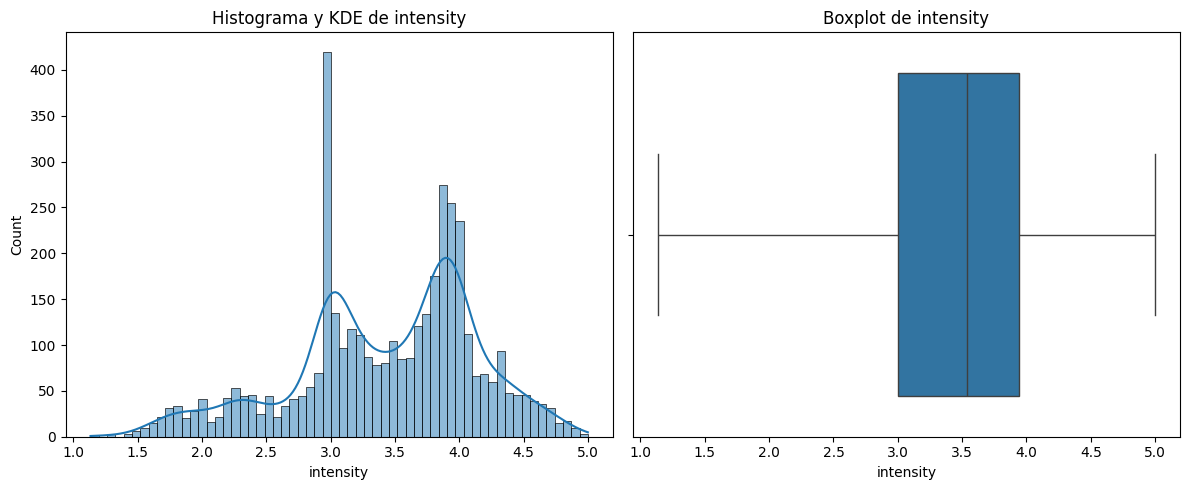

In [64]:
fn.plot_combined_graphs(wine, ['intensity'], whisker_width=2, bins=60)

#### **Symmetry and skewness**

- mean (3.43) and median (3.54) are very close together indicating a even distribution and reinforced visually by the boxplot. 
- Data has slight negative skew and therfore the median may be a more representative of the central tendency.

#### **Dispersion, Variability, outliers**

- range of 3.87
- The IQR shows that 50% of the data is concentrated around a range of 0.94 points
- std of 0.71 and CV of 21% suggest there is some variability within the middle 50% of the data (e.g. low to some dispersion).
- boxplot shows no outliers

#### **Ideas / questions**

- Large peak at 3.0
- similar to acidity
- Investigate peak at around 3.0.
    - Is there a specific `community` associated with `acidity`?
    - Is white or red causing this high peak?
- As these are reviwer submitted, could just be that its a fairly central value that people abitrarily give.

### ***`sweetness`***

(2,)


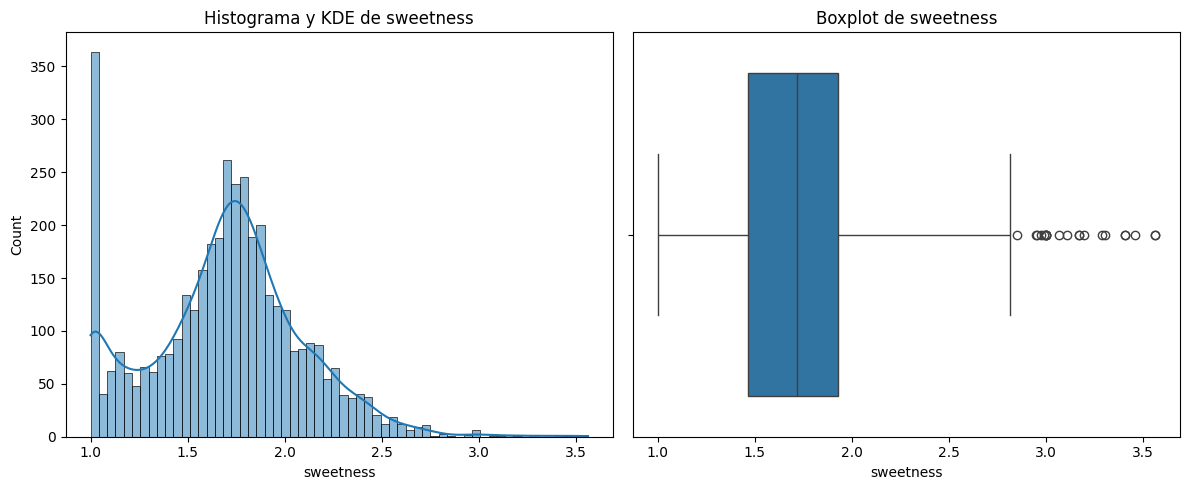

In [72]:
fn.plot_combined_graphs(wine, ['sweetness'], whisker_width=2, bins=60)

#### **Symmetry and skewness**

- mean (1.70) and median (1.72) are very close together indicating a even distribution and reinforced visually by the boxplot. 
- Data has slight positive skew which could be due to the outliers.

#### **Dispersion, Variability, outliers**

- range of 2.56
- The IQR shows that 50% of the data is concentrated around a range of 0.46 points. The tightest IQR of all numeric variables.
- std of 0.40 and CV of 23% suggest there is some variability but there is very lowe dispersion.
- boxplot shows some outliers at the top end of the sweetness range. 

#### **Ideas / questions**

- Large peak at 1.0 which given the large frequency count would be interesting to further investigate these wines in relation to other vairbables.
- similar to acidity
- An interesting group to analyse in multivariate with wine_ratings_average and price.
- sweetness a good candidate for bivariate analysis with all categoric variables


(2,)


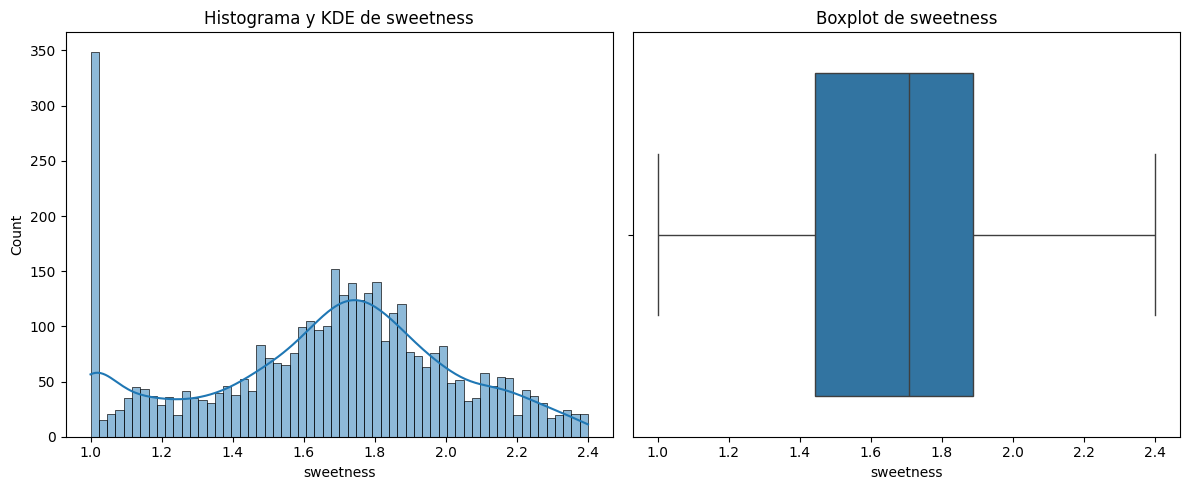

In [87]:
# filtering and visualisng the distribution without the outliers to check for the skewness of the data being caused by the outliers.
without_sweet_wine = wine[wine['sweetness'] < 2.4 ]
fn.plot_combined_graphs(without_sweet_wine, ['sweetness'], whisker_width=2, bins=60)

Number of wines in ver low peak: 411


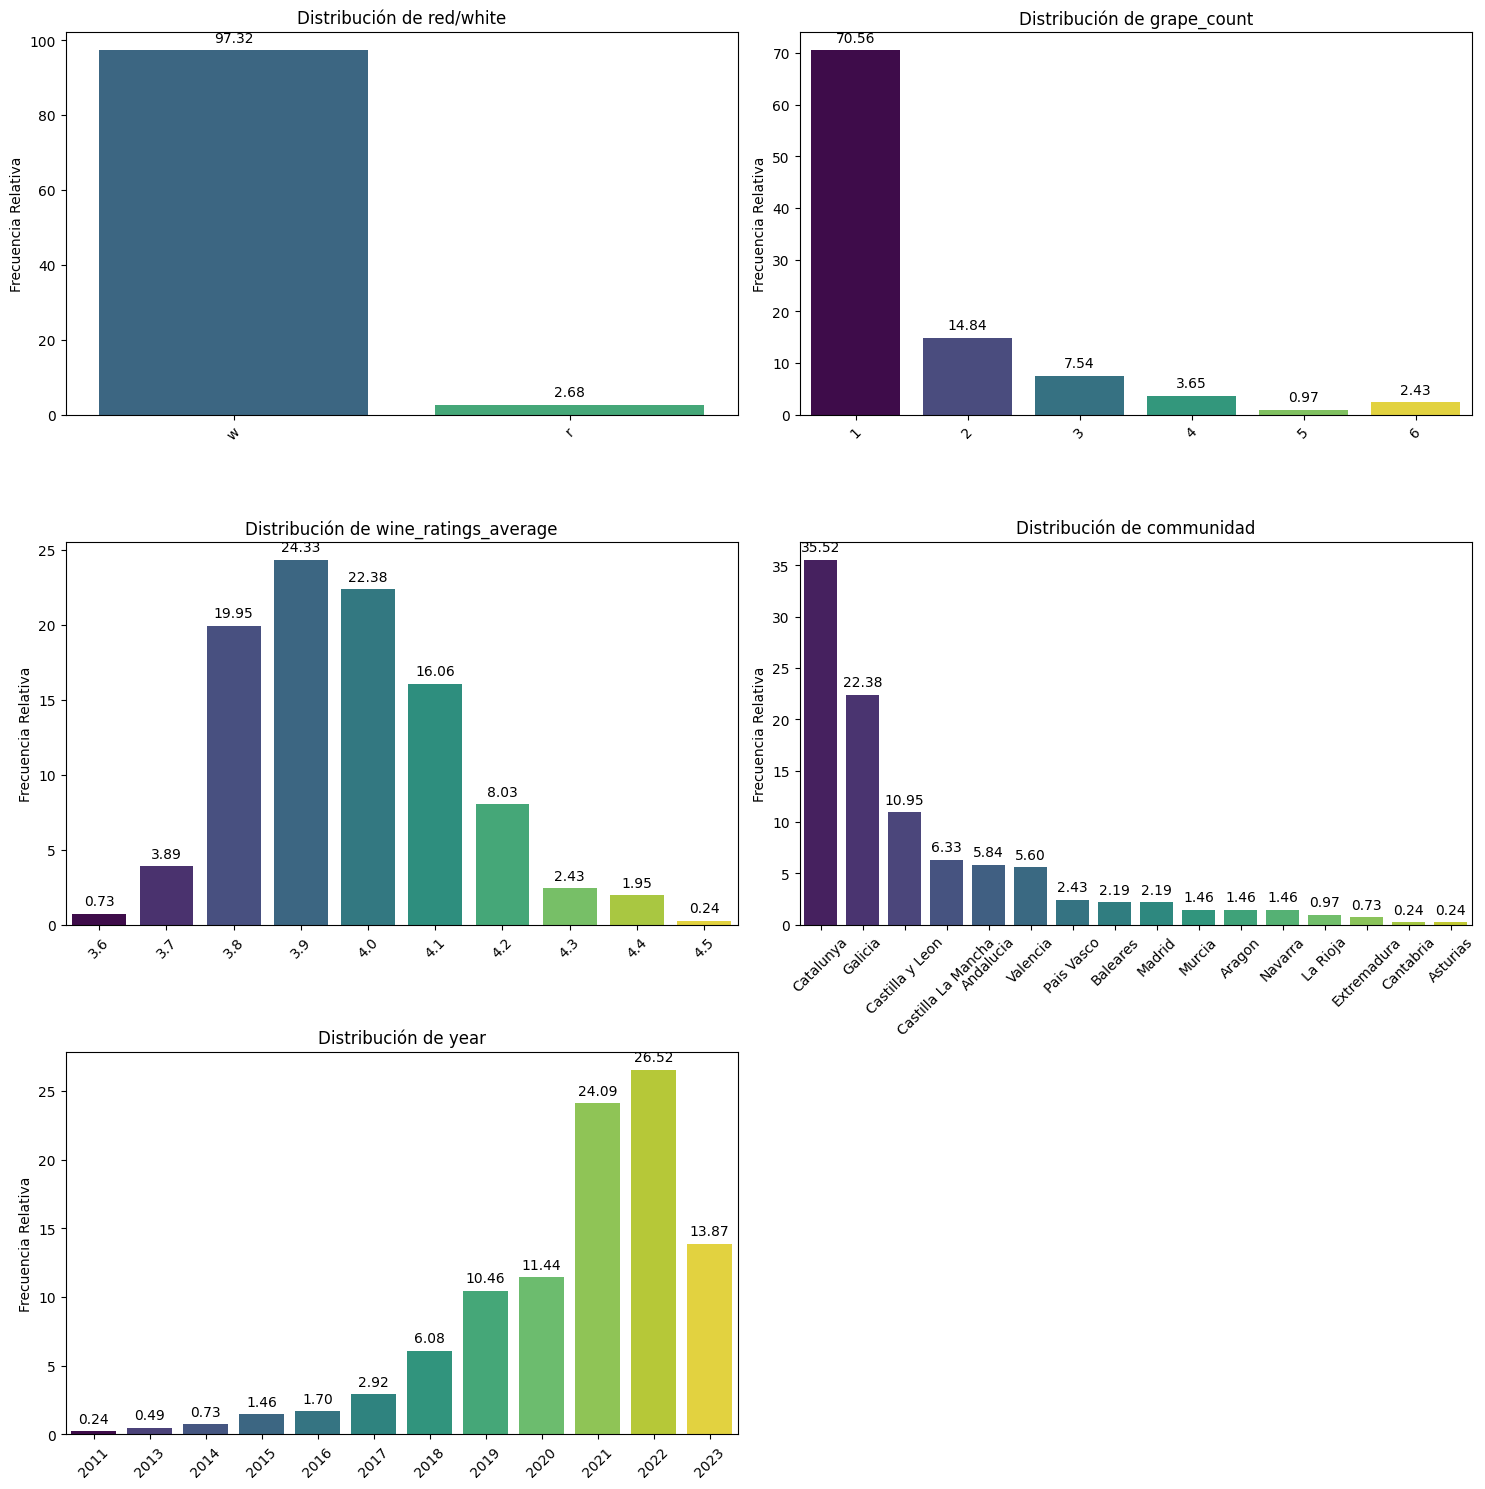

In [88]:
# Investigating peak at around 1.0
low_sweetness_peak = wine[(wine['sweetness'] >= 1) & (wine['sweetness'] < 1.1)]
print('Number of wines in very low peak:', len(low_sweetness_peak))
fn.pinta_distribucion_categoricas(low_sweetness_peak, categoricas, relativa=True, mostrar_valores=True)

#### ***Conclusions from the peak***

- Similar to what was seen in the high acidity group. nearly all very low scoring sweetness (or dry) wines in this peak are white.i would maybe have expecteed to see similar results for community however, cataluña and galica have come out on top.

### ***`tannin`***

(2,)


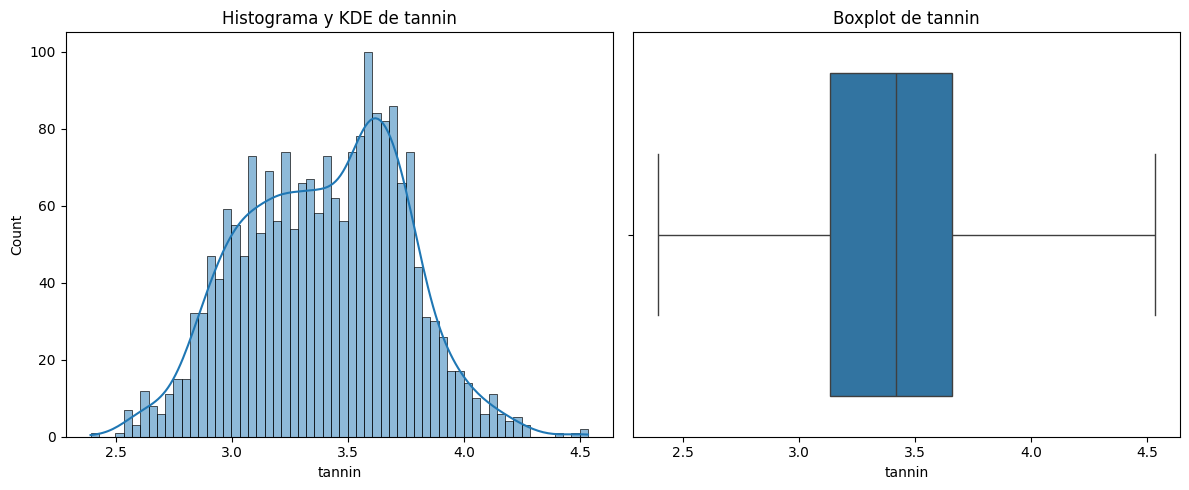

In [73]:
fn.plot_combined_graphs(wine, ['tannin'], whisker_width=2, bins=60)

#### **Symmetry and skewness**

- mean (3.40) and median (3.42) are very close together indicating a even distribution and reinforced visually by the symmetry of the boxplot. 
- Data has a v positive skew which could be due to the outliers.

#### **Dispersion, Variability, outliers**

- range of 2.14
- The IQR shows that 50% of the data is concentrated around a range of 0.53 points.
- std of 0.34 and CV of 10% suggest there is very low dispersion.
- boxplot shows some no outliers

#### **Ideas / questions**

- Could be a good variable to combine in bivariate analysis of all categoric variables and maybe include in a multivariate analysis but currently is the numeric variable presenting with least interesting facets.

## ***Key takeaways:***

#### **Bivariate Analysis:**
- `price` and `wine_ratings_average`
- `grape_count` with each of the categoric variables.
- `community` with each of the categoric variables.
- May need to create some other groups for this.

#### **Multivariate Analysis**
- `price` and `wine_ratings_average` in relation to all other numerical variables and categoric variables
- particularly interested in:

#### **Questions**
- Which community produces the highest/lowest of each characteristic (numeric variables)?
- Which community and wine colour offers the best quality (`wine_ratings_average`) for price?
    - mutliV of `price`, `wine_ratings_average` and `community` and look for low price high ratings.